**MPA Implementation**







##MPA Algorithm

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

NFE = 0

def MPA(SearchAgents_no, Max_iter, lb, ub, dim, fobj):
    global nVar
    Top_predator_pos = np.zeros(nVar)
    Top_predator_fit = np.inf
    Convergence_curve = np.zeros(Max_iter)
    stepsize = np.zeros((SearchAgents_no, nVar))
    fitness = np.full((SearchAgents_no, 1), np.inf)

    # Prey = initialization(SearchAgents_no, dim, ub, lb)
    Xmin = np.tile(np.ones(nVar) * lb, (SearchAgents_no, 1))
    Xmax = np.tile(np.ones(nVar) * ub, (SearchAgents_no, 1))

    Iter = 0
    FADs = 0.2
    P = 0.5

    while Iter < Max_iter:
        for i in range(Prey.shape[0]):
            Flag4ub = Prey[i, :] > ub
            Flag4lb = Prey[i, :] < lb
            Prey[i, :] = (Prey[i, :] * (~(Flag4ub + Flag4lb))) + ub * Flag4ub + lb * Flag4lb
            fitness[i, 0] = fobj(Prey[i, :])

            if fitness[i, 0] < Top_predator_fit:
                Top_predator_fit = fitness[i, 0]
                Top_predator_pos = Prey[i, :]

        if Iter == 0:
            fit_old = fitness
            Prey_old = Prey

        Inx = (fit_old < fitness)
        Indx = np.tile(Inx, (1, dim))
        Prey = Indx * Prey_old + (~Indx) * Prey
        fitness = Inx * fit_old + (~Inx) * fitness
        fit_old = fitness
        Prey_old = Prey

        Elite = np.tile(Top_predator_pos, (SearchAgents_no, 1))
        CF = (1 - Iter / Max_iter)**(2 * Iter / Max_iter)
        RL = 0.05 * levy(SearchAgents_no, dim, 1.5)
        RB = np.random.randn(SearchAgents_no, dim)

        for i in range(Prey.shape[0]):
            for j in range(Prey.shape[1]):
                R = np.random.rand()
                if Iter < Max_iter / 3:
                    stepsize[i, j] = RB[i, j] * (Elite[i, j] - RB[i, j] * Prey[i, j])
                    Prey[i, j] = Prey[i, j] + P * R * stepsize[i, j]
                elif Iter > Max_iter / 3 and Iter < 2 * Max_iter / 3:
                    if i > (Prey.shape[0] / 2):
                        stepsize[i, j] = RB[i, j] * (RB[i, j] * Elite[i, j] - Prey[i, j])
                        Prey[i, j] = Elite[i, j] + P * CF * stepsize[i, j]
                    else:
                        stepsize[i, j] = RL[i, j] * (Elite[i, j] - RL[i, j] * Prey[i, j])
                        Prey[i, j] = Prey[i, j] + P * R * stepsize[i, j]
                else:
                    stepsize[i, j] = RL[i, j] * (RL[i, j] * Elite[i, j] - Prey[i, j])
                    Prey[i, j] = Elite[i, j] + P * CF * stepsize[i, j]

        for i in range(Prey.shape[0]):
            Flag4ub = Prey[i, :] > ub
            Flag4lb = Prey[i, :] < lb
            Prey[i, :] = (Prey[i, :] * (~(Flag4ub + Flag4lb))) + ub * Flag4ub + lb * Flag4lb
            fitness[i, 0] = fobj(Prey[i, :])

            if fitness[i, 0] < Top_predator_fit:
                Top_predator_fit = fitness[i, 0]
                Top_predator_pos = Prey[i, :]

        if Iter == 0:
            fit_old = fitness
            Prey_old = Prey

        Inx = (fit_old < fitness)
        Indx = np.tile(Inx, (1, dim))
        Prey = Indx * Prey_old + (~Indx) * Prey
        fitness = Inx * fit_old + (~Inx) * fitness
        fit_old = fitness
        Prey_old = Prey

        if np.random.rand() < FADs:
            U = np.random.rand(SearchAgents_no, dim) < FADs
            Prey = Prey + CF * ((Xmin + np.random.rand(SearchAgents_no, dim) * (Xmax - Xmin)) * U)
        else:
            r = np.random.rand()
            Rs = Prey.shape[0]
            stepsize = (FADs * (1 - r) + r) * (Prey[np.random.permutation(Rs), :] - Prey[np.random.permutation(Rs), :])
            Prey = Prey + stepsize

        Iter += 1
        Convergence_curve[Iter - 1] = Top_predator_fit

    return Top_predator_fit, Top_predator_pos, Convergence_curve

##Levy Function

In [ ]:
def levy(n, m, beta):
    num = np.math.gamma(1 + beta) * np.sin(np.pi * beta / 2)  # used for Numerator
    den = np.math.gamma((1 + beta) / 2) * beta * 2 ** ((beta - 1) / 2)  # used for Denominator
    sigma_u = (num / den) ** (1 / beta)  # Standard deviation
    u = np.random.normal(0, sigma_u, (n, m))
    v = np.random.normal(0, 1, (n, m))
    z = u / (np.abs(v) ** (1 / beta))
    return z

##Cost functions

In [ ]:
def CostFunction(x, a):
  global NFE
  NFE = NFE + 1
  match a:
    case "Ackley":
      return Ackley(x)
    case "Rosenbrock":
      return Rosenbrock(x)
    case "Rastrigin":
      return Rastrigin(x)
    case "Griewank":
      return Griewank(x)
    case "Schwefel":
      return Schwefel(x)
    case _:
      return Ackley(x)

def Ackley(x):
  d = len(x)
  a = 20
  b = 0.2
  c = 2 * np.pi
  s1 = 0
  s2 = 0
  for i in range(d):
    s1 = s1 + x[i] ** 2
    s2 = s2 + np.cos(c * x[i])
  y = -a * np.exp(-b * np.sqrt(1 / d * s1)) - np.exp(1 / d * s2) + a + np.exp(1)
  return y

def Rosenbrock(x):
  return np.sum(100 * (x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2)

def Rastrigin(x):
  q1=10 * len(x) + np.sum(x**2 - 10 * np.cos(2 * np.pi * x))
  return q1

def Griewank(x):
  term1 = np.sum(x**2) / 4000
  term2 = np.prod(np.cos(x / np.sqrt(np.arange(1, len(x) + 1))))
  return term1 - term2 + 1

def Schwefel(x):
  return 418.9829 * len(x) - np.sum(x * np.sin(np.sqrt(np.abs(x))))

##Plot Functions

In [ ]:
def PlotFunction(a):
  match a:
    case "Ackley":
      return Ackley_plt()
    case "Rosenbrock":
      return Rosenbrock_plt()
    case "Rastrigin":
      return Rastrigin_plt()
    case "Griewank":
      return Griewank_plt()
    case "Schwefel":
      return Schwefel_plt()
    case _:
      return Ackley_plt()

def Ackley2(x,y):
  a = 20
  b = 0.2
  c = 2 * np.pi
  term1 = -a * np.exp(-b * np.sqrt(0.5 * (x**2 + y**2)))
  term2 = -np.exp(0.5 * (np.cos(c * x) + np.cos(c * y)))
  return term1 + term2 + a + np.exp(1)

def Rosenbrock2(x,y):
  return 100 * (y - x**2)**2 + (1 - x)**2

def Rastrigin2(x,y):
  return 20 + x**2 - 10 * np.cos(2 * np.pi * x) + y**2 - 10 * np.cos(2 * np.pi * y)

def Griewank2(x,y):
  return (x**2 + y**2) / 4000 - np.cos(x) * np.cos(y / np.sqrt(2)) + 1

def Schwefel2(x,y):
  return 418.9829 * 2 - x * np.sin(np.sqrt(np.abs(x))) - y * np.sin(np.sqrt(np.abs(y)))

def Ackley_plt():
  # Generate x, y values
  x = np.linspace(-5, 5, 100)
  y = np.linspace(-5, 5, 100)
  X, Y = np.meshgrid(x, y)
  # Evaluate the Ackley function at each (x, y) point
  Z = Ackley2(X, Y)
  # Create a 3D plot
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  # Plot the surface
  ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k')
  # Set labels
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Ackley Function')
  # Set title
  ax.set_title('3D Plot of Ackley Function')
  # Show the plot
  plt.show()

def Rosenbrock_plt():
  # Generate x, y values
  x = np.linspace(-2, 2, 100)
  y = np.linspace(-1, 3, 100)
  X, Y = np.meshgrid(x, y)
  # Evaluate the Rosenbrock function at each (x, y) point
  Z = Rosenbrock2(X, Y)
  # Create a 3D plot
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  # Plot the surface
  ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k')
  # Set labels
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Rosenbrock Function')
  # Set title
  ax.set_title('3D Plot of Rosenbrock Function')
  # Show the plot
  plt.show()

def Rastrigin_plt():
  # Generate x, y values
  x = np.linspace(-5.12, 5.12, 100)
  y = np.linspace(-5.12, 5.12, 100)
  X, Y = np.meshgrid(x, y)
  # Evaluate the Rastrigin function at each (x, y) point
  Z = Rastrigin2(X, Y)
  # Create a 3D plot
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  # Plot the surface
  ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k')
  # Set labels
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Rastrigin Function')
  # Set title
  ax.set_title('3D Plot of Rastrigin Function')
  # Show the plot
  plt.show()

def Griewank_plt():
  # Generate x, y values
  x = np.linspace(-600, 600, 100)
  y = np.linspace(-600, 600, 100)
  X, Y = np.meshgrid(x, y)
  # Evaluate the Griewank function at each (x, y) point
  Z = Griewank2(X, Y)
  # Create a 3D plot
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  # Plot the surface
  ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k')
  # Set labels
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Griewank Function')
  # Set title
  ax.set_title('3D Plot of Griewank Function')
  # Show the plot
  plt.show()

def Schwefel_plt():
  # Generate x, y values
  x = np.linspace(-500, 500, 100)
  y = np.linspace(-500, 500, 100)
  X, Y = np.meshgrid(x, y)
  # Evaluate the Schwefel function at each (x, y) point
  Z = Schwefel2(X, Y)
  # Create a 3D plot
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  # Plot the surface
  ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k')
  # Set labels
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Schwefel Function')
  # Set title
  ax.set_title('3D Plot of Schwefel Function')
  # Show the plot
  plt.show()

##Optimalization Function

In [ ]:
def OPT(Tf_num):
  global NFE
  NFE = 0  # Number of Function Evaluations

  # Number of decision variables
  nVar = 2

  # Lower and upper bounds
  VarMin = -30
  VarMax = 40

  # General Parameters
  MaxIt = 230  # Maximum Iteration
  nPop = 400   # Number of Population (Prey)

  # Special Params of MPA
  FADs = 0.2
  P = 0.5
  NFE = 0  # Number of Function Evaluations

  # Initialization of memory to save the best result
  Best_Fit_Memory = np.inf  # Initialize with infinity or a very large value
  Best_Pos_Memory = np.zeros(nVar)  # Initialize with zeros


  # Initialization
  fitness = np.zeros(nPop)
  Prey = np.zeros((nPop, nVar))
  for i in range(nPop):
      Prey[i, :] = np.random.uniform(VarMin, VarMax, nVar)
      fitness[i] = CostFunction(Prey[i, :], Tf_num)  # Assuming CostFunction is defined elsewhere

  # Find The Best
  iDBest = np.argmin(fitness)
  BsetFit = fitness[iDBest]
  Top_predator_Pos = Prey[iDBest, :].copy()
  Top_predator_Fit = BsetFit
  Xmin = np.tile(np.ones(nVar) * VarMin, (nPop, 1))
  Xmax = np.tile(np.ones(nVar) * VarMax, (nPop, 1))
  stepsize = np.zeros((nPop, nVar))
  fit_old = fitness.copy()
  Prey_old = Prey.copy()
  nfe = np.zeros(MaxIt)  # number of function evaluation
  Convergence_curve = np.zeros(MaxIt)  # Convergence curve

  # Main Loop of MPA
  for it in range(MaxIt):
    #------------------ Detecting top predator ------------------
      for i in range(nPop):

          Prey[i, :] = np.maximum(np.minimum(Prey[i, :], VarMax), VarMin)
          fitness[i] = CostFunction(Prey[i, :], Tf_num)

          if fitness[i] < Top_predator_Fit:
              Top_predator_Fit = fitness[i]
              Top_predator_Pos = Prey[i, :]

      Elite = np.tile(Top_predator_Pos, (nPop, 1))
      CF = (1 - it / MaxIt) ** (2 * it / MaxIt)

      RL = 0.05 * levy(nPop, nVar, 1.5)
      RB = np.random.randn(nPop, nVar)

      for i in range(nPop):
          for j in range(nVar):
              R = np.random.rand()
          # Phase 1 (Eq.6)
              if it < MaxIt/3:
                  stepsize[i, j] = RB[i, j] * (Elite[i, j] - RB[i, j] * Prey[i, j])
                  Prey[i, j] = Prey[i, j] + P * R * stepsize[i, j]
          #  Phase 2 (Eqs. 7 & 8)
              elif it > MaxIt/3 and it < 2*MaxIt/3:
                    if i > nPop/2:
                        stepsize[i, j] = RB[i, j] * (RB[i, j] * Elite[i, j] - Prey[i, j])
                        Prey[i, j] = Elite[i, j] + P * CF * stepsize[i, j]
                    else:
                        stepsize[i, j] = RL[i, j] * (Elite[i, j] - RL[i, j] * Prey[i, j])
                        Prey[i, j] = Prey[i, j] + P * R * stepsize[i, j]
          #  Phase 3 (Eq. 9)
              else:
                    stepsize[i, j] = RL[i, j] * (RL[i, j] * Elite[i, j] - Prey[i, j])
                    Prey[i, j] = Elite[i, j] + P * CF * stepsize[i, j]
      #  Detecting top predator
      for i in range(nPop):

          Prey[i, :] = np.maximum(np.minimum(Prey[i, :], VarMax), VarMin)
          fitness[i] = CostFunction(Prey[i, :], Tf_num)

          if fitness[i] < Top_predator_Fit:
              Top_predator_Fit = fitness[i]
              Top_predator_Pos = Prey[i, :]



        # Eddy formation and FADs' effect (Eq 3)
      if np.random.rand() < FADs:
          U = np.random.rand(nPop, nVar) < FADs
          Prey = Prey + CF * ((Xmin + np.random.rand(nPop, nVar) * (Xmax - Xmin)) * U)
      else:
          r = np.random.rand()
          Rs = Prey.shape[0]
          stepsize = (FADs * (1 - r) + r) * (Prey[np.random.permutation(Rs), :] - Prey[np.random.permutation(Rs), :])
          Prey = Prey + stepsize

  # Detecting top predator
      for i in range(nPop):
          Prey[i, :] = np.maximum(np.minimum(Prey[i, :], VarMax), VarMin)
          fitness[i] = CostFunction(Prey[i, :], Tf_num)

          if fitness[i] < Top_predator_Fit:
              Top_predator_Fit = fitness[i]
              Top_predator_Pos = Prey[i, :]
      nfe[it] = NFE
      # print('Iteration {}: NFE = {}, Best Cost = {}'.format(it, nfe[it], Top_predator_Fit))
      Convergence_curve[it] = Top_predator_Fit
  PlotFunction(Tf_num)
  # Plot convergence curve
  plt.plot(np.arange(1, MaxIt + 1), Convergence_curve, linewidth=2)
  plt.xlabel('Iteration')
  plt.ylabel('Best Cost')
  plt.title('MPA Progress')
  plt.show()
  print('Best Position:', Top_predator_Pos)


##Results

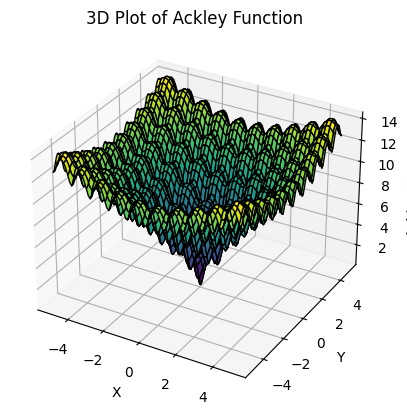

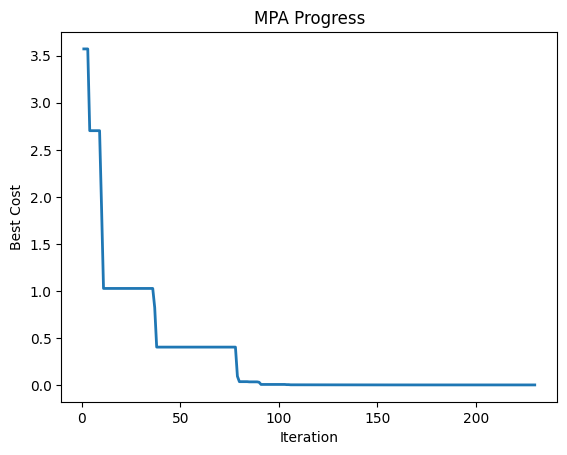

Best Position: [-2.83026994e-16 -1.08566499e-16]


In [ ]:
OPT("Ackley")

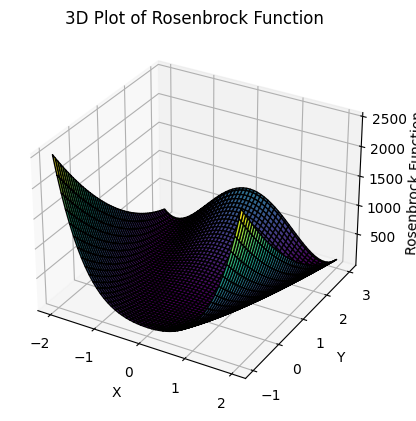

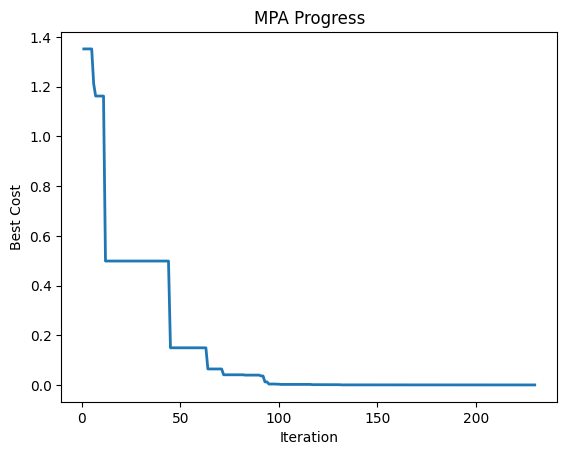

Best Position: [1.0043903  0.98463727]


In [ ]:
OPT("Rosenbrock")

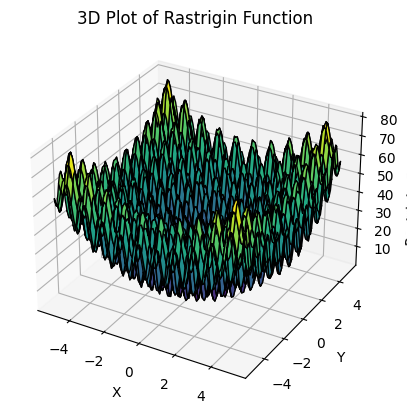

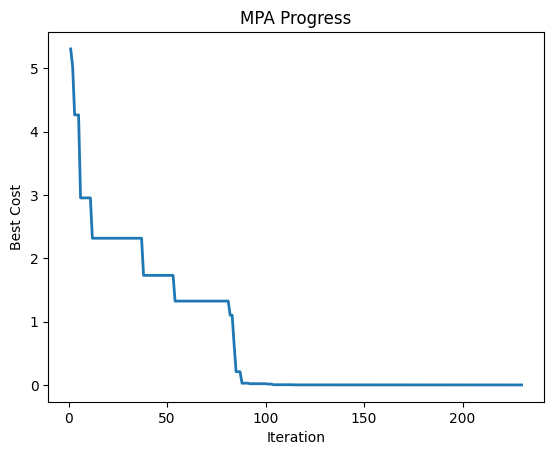

Best Position: [3.57489080e-09 2.43033005e-10]


In [ ]:
OPT("Rastrigin")

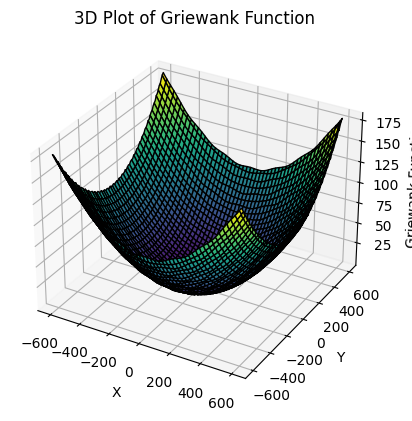

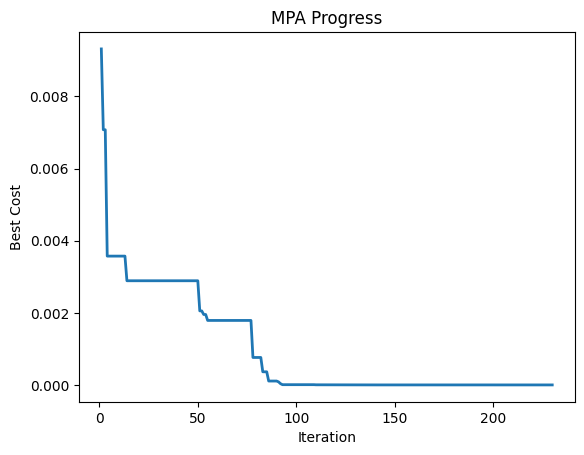

Best Position: [-8.30289460e-09 -1.17900817e-09]


In [ ]:
OPT("Griewank")

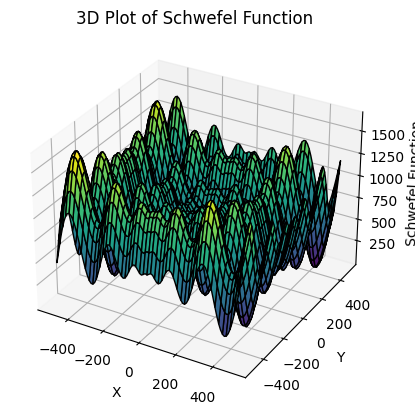

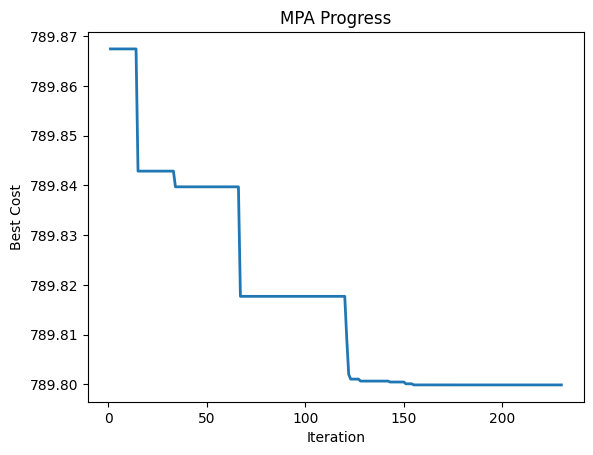

Best Position: [-25.87741724 -25.87741743]


In [ ]:
OPT("Schwefel")